<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

In [32]:
np.random.seed(42)

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [3]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [4]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

def plot_clusters(df, name):
    plt.scatter(df['x'], df['y'], c=df['label'], cmap='viridis', s=50)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{name}')
    plt.show()

In [5]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

In [6]:
for df in dfs:
    print(f'{df[1]} has {df[0]["label"].nunique()} labels')

flame has 2 labels
agg has 7 labels
comp has 6 labels
jain has 2 labels
path has 3 labels
r15 has 15 labels
spiral has 3 labels


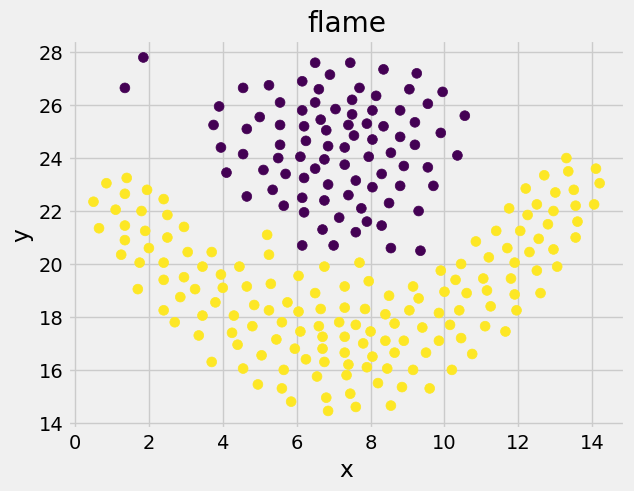

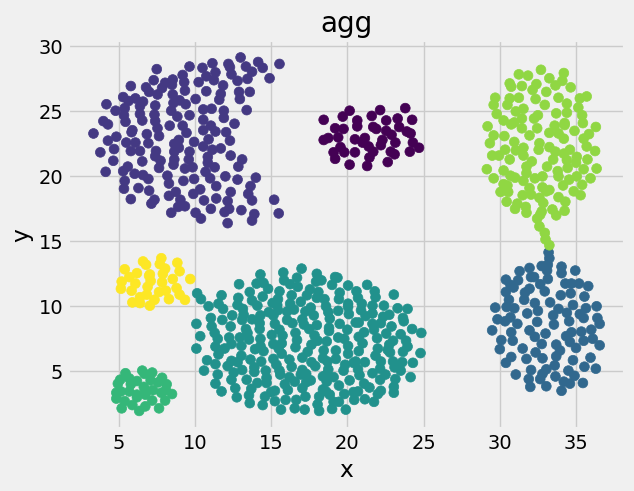

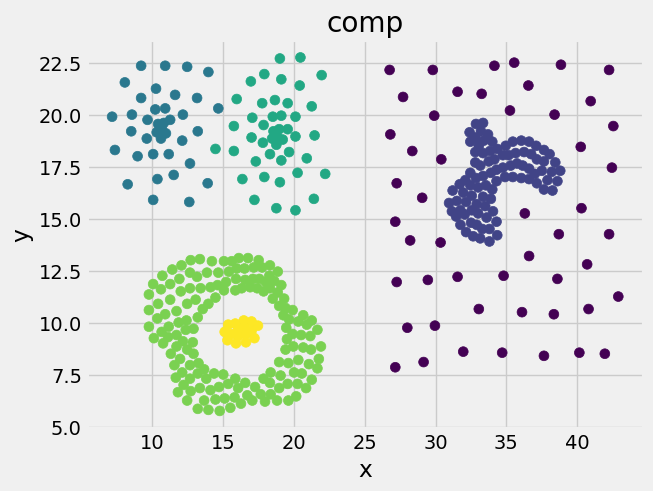

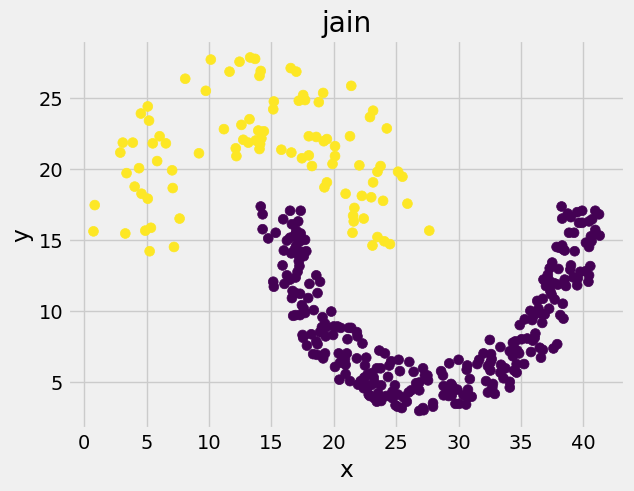

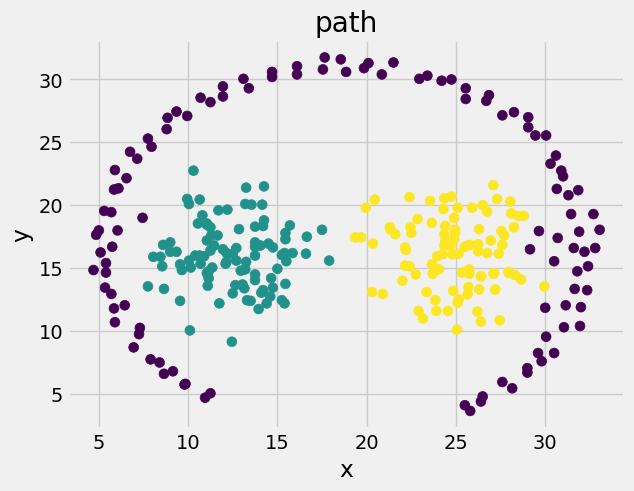

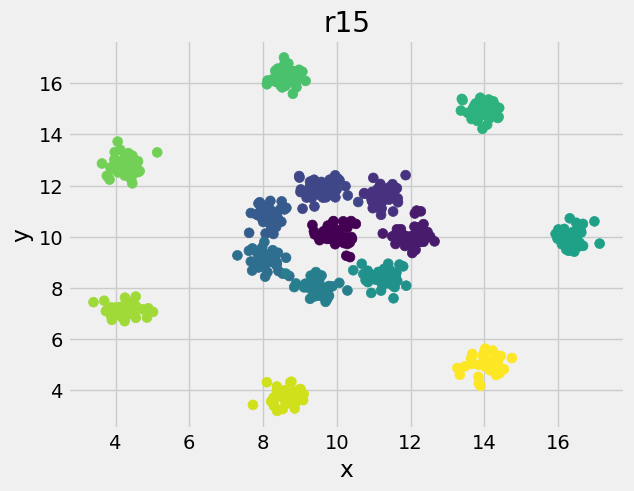

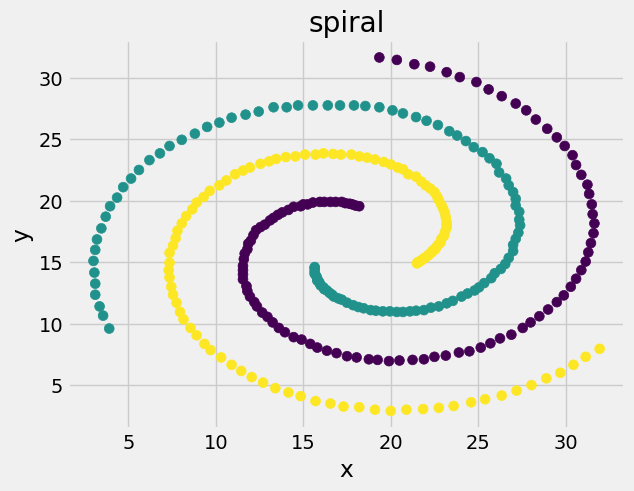

In [7]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [113]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [9]:
# Write your function to scale data here.
def scale_matrix(X):
    # Initialize StandardScaler
    ss = StandardScaler()
    
    # Fit scaler to the data and transform it
    X_sc = ss.fit_transform(X)
    
    return X_sc

In [91]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, cl):
    X = df.loc[:, ['x', 'y']]
    # Scale data
    X_sc = scale_matrix(X)
    # Fit clusterer
    cl.fit(X_sc)
    # Print Silhouette Score
    silhouette_avg = silhouette_score(X_sc, cl.labels_)
    print(silhouette_avg)
    
    # Plot
    plt.scatter(df['x'], df['y'], c=cl.labels_, cmap='viridis', s=50)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{cl} clustering')
    plt.show();

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.3733173841508355


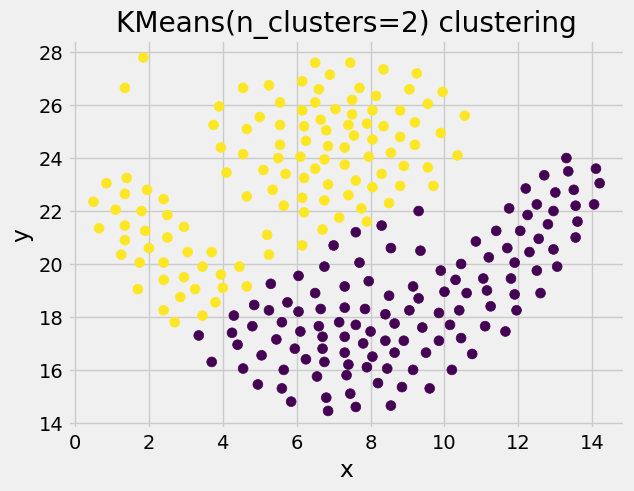

0.2245440324052778


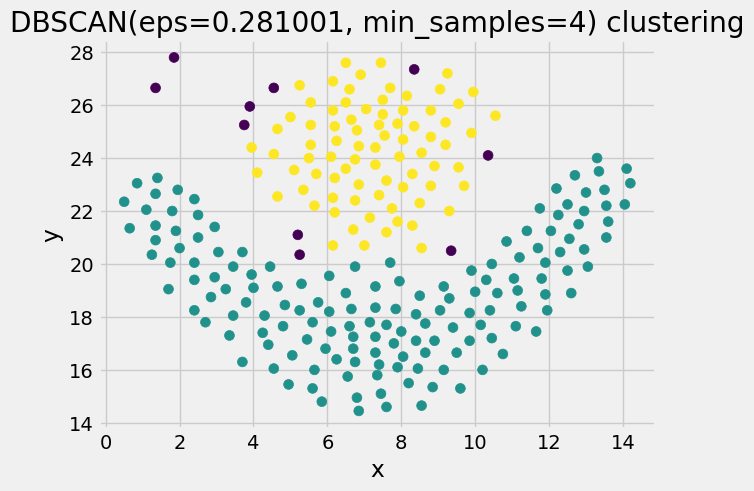

0.3524942517997597


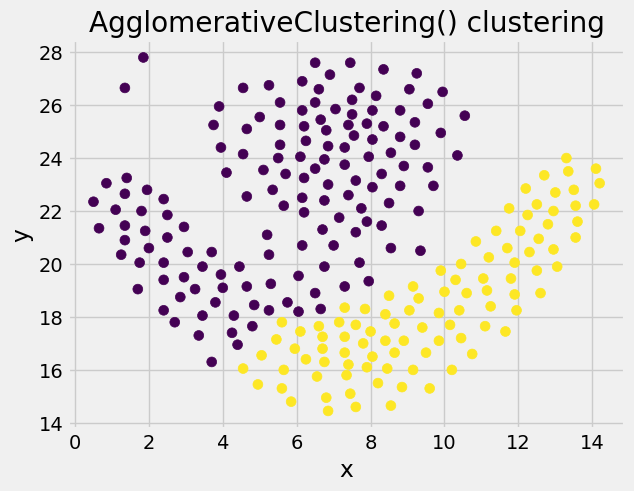

In [92]:
km = KMeans(n_clusters=2)
plot_results(flame,km);
dbscan = DBSCAN(eps=0.281001, min_samples=4)
plot_results(flame,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=2)
plot_results(flame,Hclustering);

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0.47167783159171955


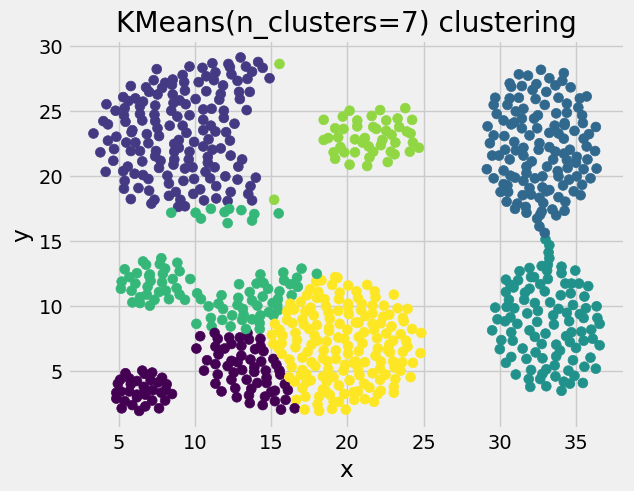

0.4596533225625242


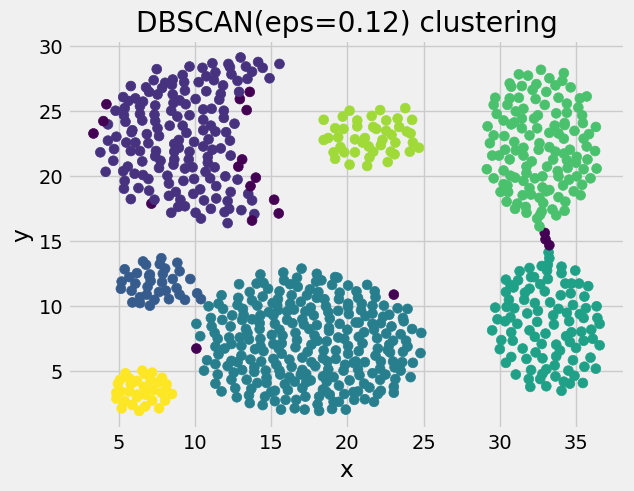

0.4456446500640389


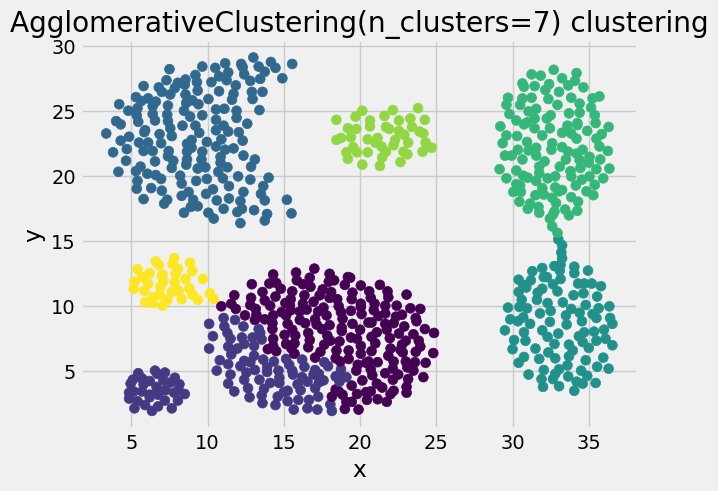

In [93]:
km = KMeans(n_clusters=7)
plot_results(agg,km);
dbscan = DBSCAN(eps=0.12, min_samples=5)
plot_results(agg,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=7)
plot_results(agg,Hclustering);

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.41876149945962643


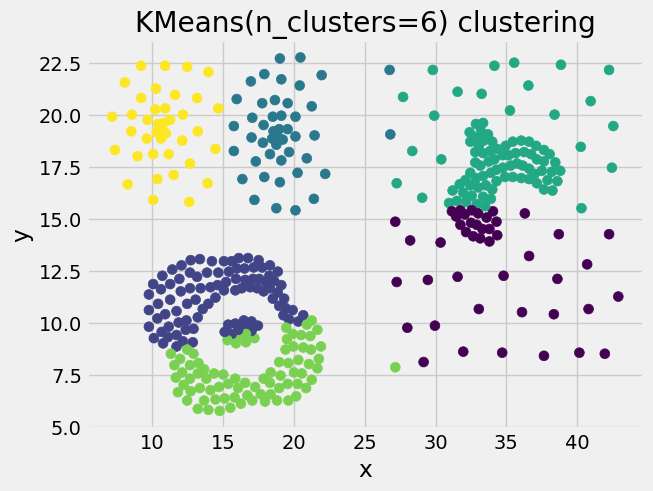

0.09323436937641884


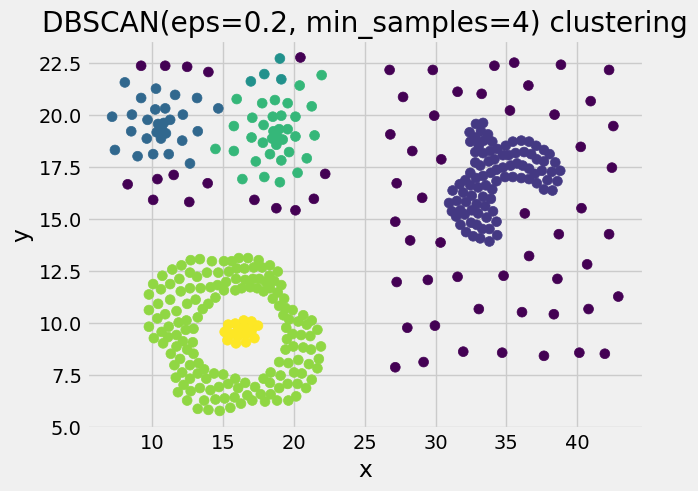

0.40553337601893963


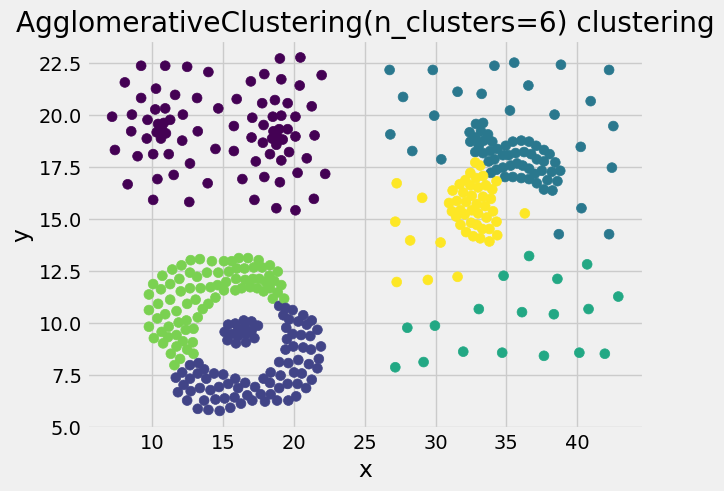

In [95]:
km = KMeans(n_clusters=6)
plot_results(comp,km);
dbscan = DBSCAN(eps=0.2, min_samples=4)
plot_results(comp,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=6)
plot_results(comp,Hclustering);

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5044779516212523


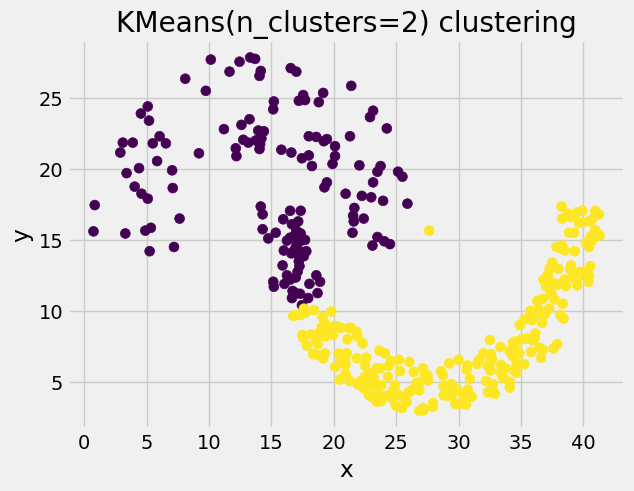

0.3480970912583266


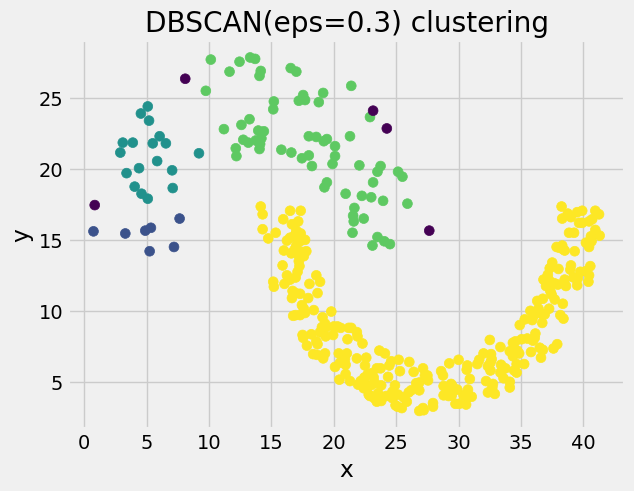

0.5042663862106481


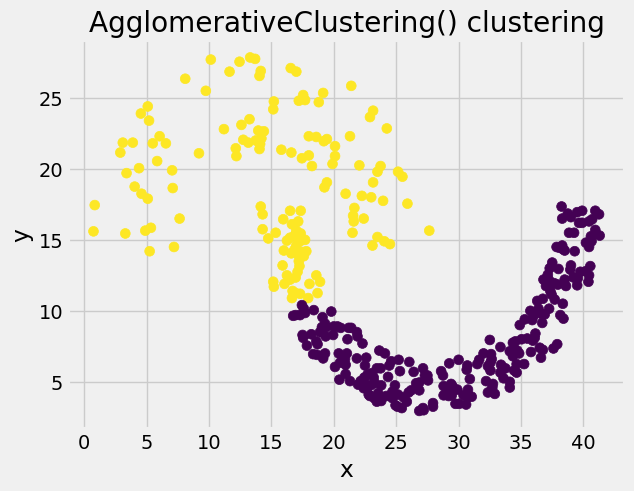

In [96]:
km = KMeans(n_clusters=2)
plot_results(jain,km);
dbscan = DBSCAN(eps=0.3, min_samples=5)
plot_results(jain,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=2)
plot_results(jain,Hclustering);

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.5092065033223903


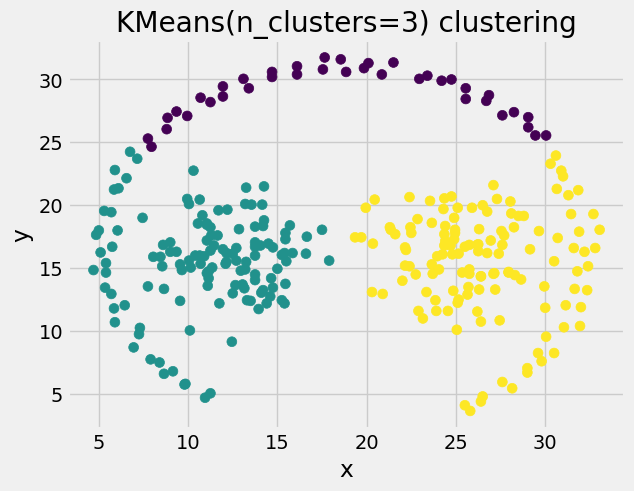

0.23281885461157661


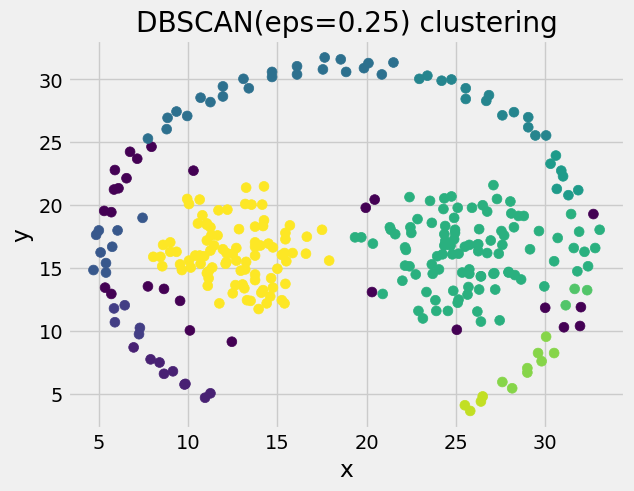

0.5007977633074632


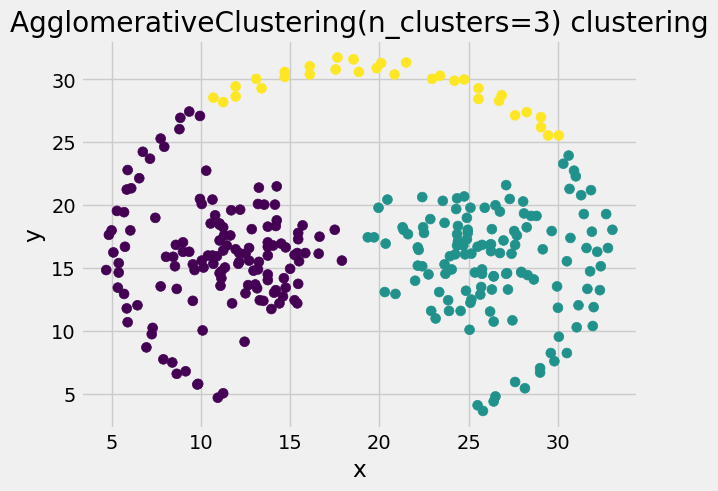

In [97]:
km = KMeans(n_clusters=3)
plot_results(path,km);
dbscan = DBSCAN(eps=0.25, min_samples=5)
plot_results(path,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=3)
plot_results(path,Hclustering);

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.7527351144186859


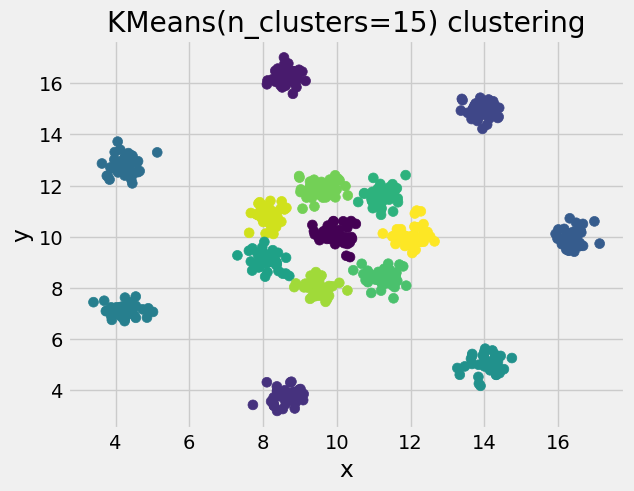

0.6253242745237494


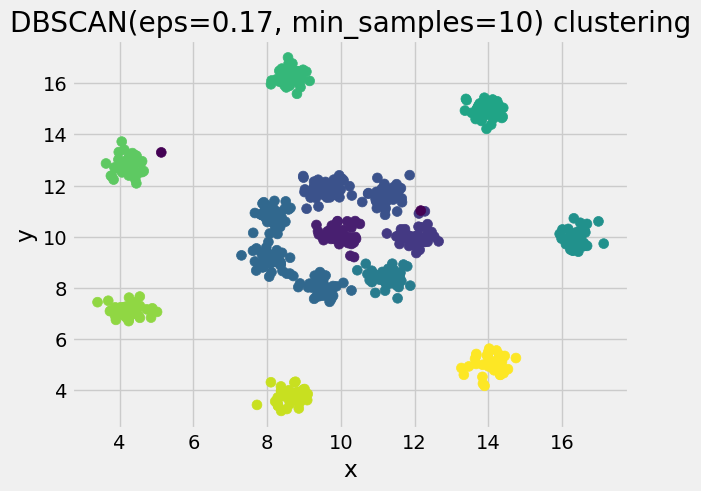

0.7495032842997014


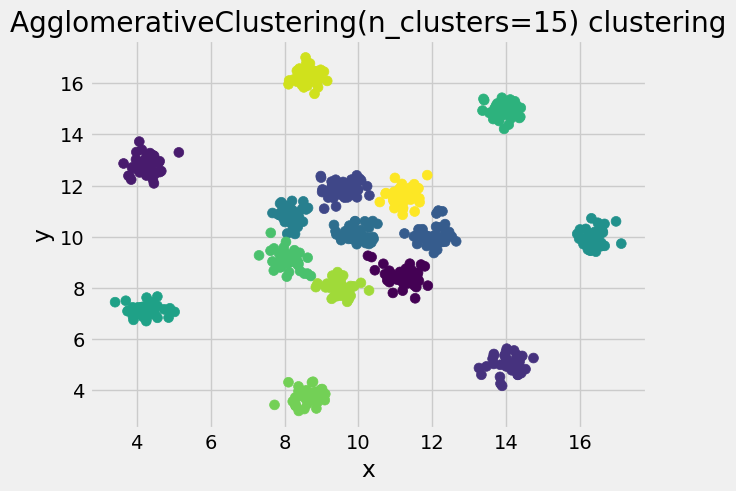

In [102]:
km = KMeans(n_clusters=15)
plot_results(r15,km);
dbscan = DBSCAN(eps=0.17, min_samples=10)
plot_results(r15,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=15)
plot_results(r15,Hclustering);

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\muzaf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.3619014060866812


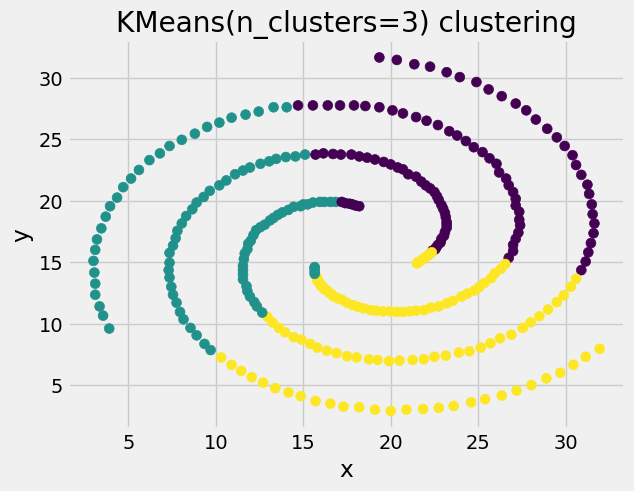

-0.2333502088017945


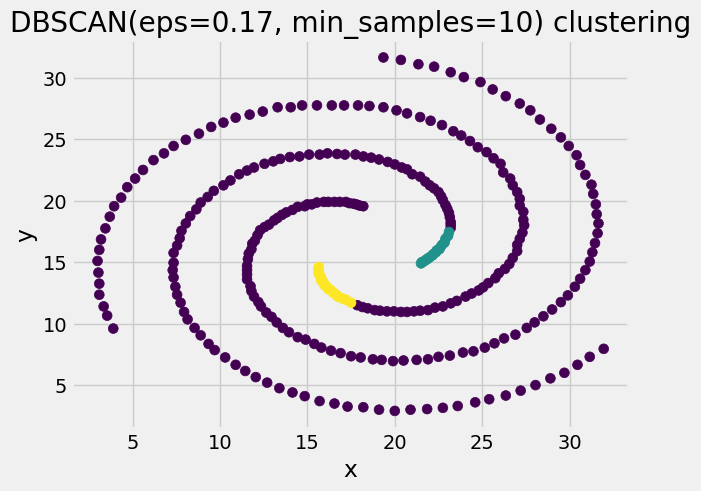

0.3277786301059895


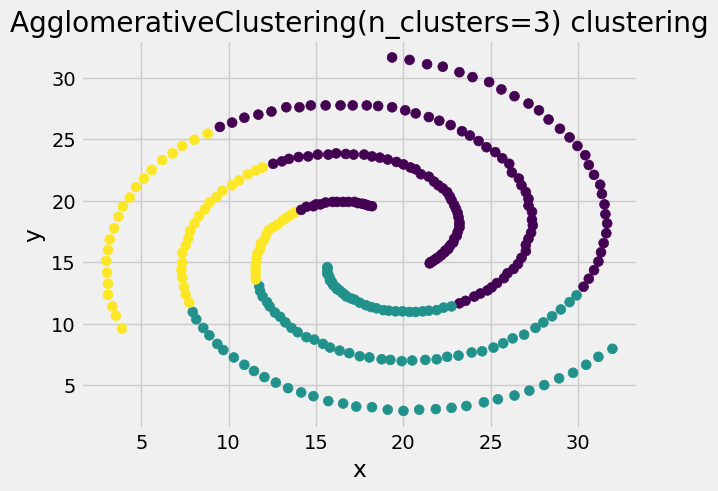

In [104]:
km = KMeans(n_clusters=3)
plot_results(spiral,km);
dbscan = DBSCAN(eps=0.17, min_samples=10)
plot_results(spiral,dbscan);
Hclustering = AgglomerativeClustering(n_clusters=3)
plot_results(spiral,Hclustering);

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [18]:
pd.set_option('display.max_columns', 25)

In [19]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [20]:
mel = mel.rename(columns={'Lattitude': 'lat', 'Longtitude': 'long', 'Price': 'price'})

In [21]:
mel.head()

,Suburb,Address,Rooms,Type,price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,lat,long,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [22]:
mel.dropna(subset=['lat','long','price'], inplace=True)

In [23]:
mel.reset_index(drop=True, inplace=True)

In [24]:
mel.head()

,Suburb,Address,Rooms,Type,price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,lat,long,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


### 5c) Plot lat vs long
What kind of clustering do you want to do?

In [25]:
lat_long = mel[['lat', 'long']]

In [26]:
lat_long

,lat,long
0,-37.79960,144.99840
1,-37.80790,144.99340
2,-37.80930,144.99440
3,-37.79690,144.99690
4,-37.80720,144.99410
...,...,...
20988,-37.81095,144.88516
20989,-37.81053,144.88467
20990,-37.81551,144.88826
20991,-37.82286,144.87856


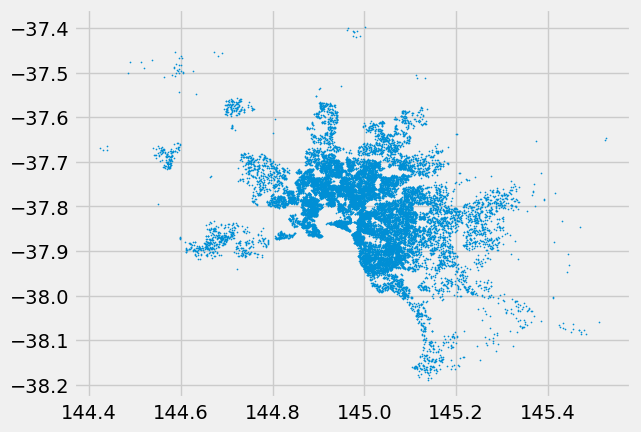

In [109]:
plt.scatter(mel['long'],mel['lat'], s=0.5)

I want to try Hierarchical Clustering.

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [106]:
# scale our data
ss = StandardScaler()
X_scaled = ss.fit_transform(lat_long)

In [112]:
labels = Hclustering.labels_
labels

array([ 9, 11, 11, ...,  3,  3,  3], dtype=int64)

In [114]:
Z = linkage(lat_long, 'ward')

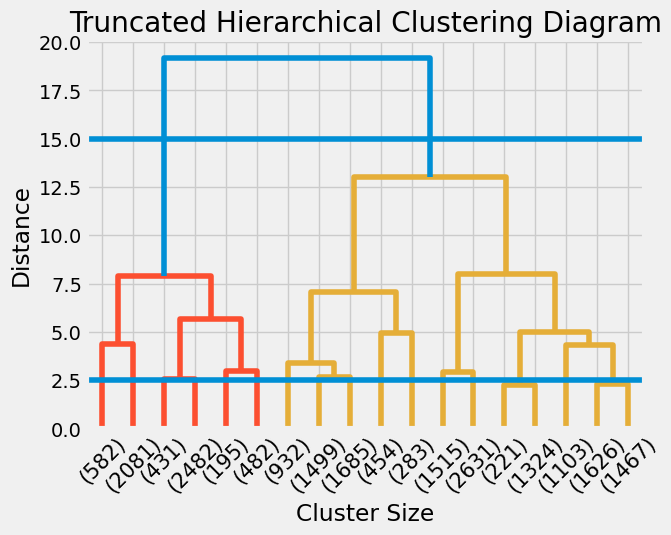

In [132]:
# create dendogram using clustering results, Z from above
dendrogram(Z, truncate_mode='lastp', p=18, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# create horizontal lines on the plot
plt.axhline(y=15)
plt.axhline(y=2.5)

# display dendogram
plt.show()

In [111]:
Hclustering = AgglomerativeClustering(n_clusters=16)
Hclustering.fit(X_scaled)
silhouette_score(X_scaled, Hclustering.labels_)

0.35663979700449644

### 5e) Cluster and plot clusters

In [117]:
mel['cluster'] = Hclustering.labels_

<Axes: xlabel='long', ylabel='lat'>

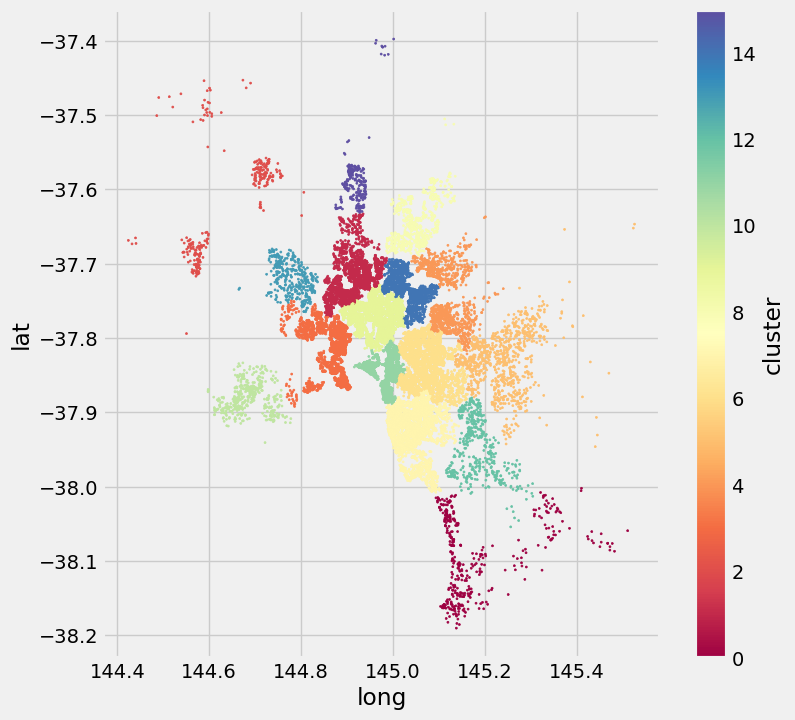

In [118]:
mel.plot(
    kind='scatter',
    x='long',
    y='lat',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
)

### 5f) Do prices differ by cluster?

Text(0, 0.5, 'Mean Price')

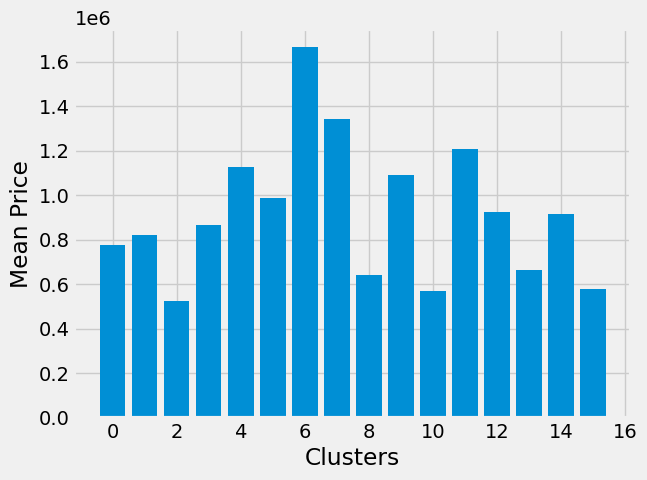

In [130]:
price_of_each_cluster = mel.groupby('cluster')['price'].mean()
plt.bar(price_of_each_cluster.index, price_of_each_cluster)
plt.xlabel('Clusters')
plt.ylabel('Mean Price')

Yes, prices differ by cluster. The highest price is Cluster 6, which is AUD 1.6 million. The lowest is cluster 2, which is AUD 500,000.